In [448]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv
from scipy.spatial.transform import Rotation as R

# import pmcpy as mcpy 
import numpy as np
import matplotlib.pyplot as plt
#from pmcpy import so3, Chain, RBP, Pivot, Crankshaft, Dumps, SingleTriad, ClusterTrans
import pmcpy.run.equilibrate as em # actually not equilibrate but energy minimization

# # # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# # import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

[autoreload of pymdna.geometry failed: Traceback (most recent call last):
  File "/Users/thor/miniforge3/envs/mdna/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/thor/miniforge3/envs/mdna/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Users/thor/miniforge3/envs/mdna/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 991, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1129, in get_code
  File "<frozen importlib._bootstrap_external>", line 1059, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Users/thor/surfdrive/Projects/pymdna/pymdna/geometry.py", line 25

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 24



(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

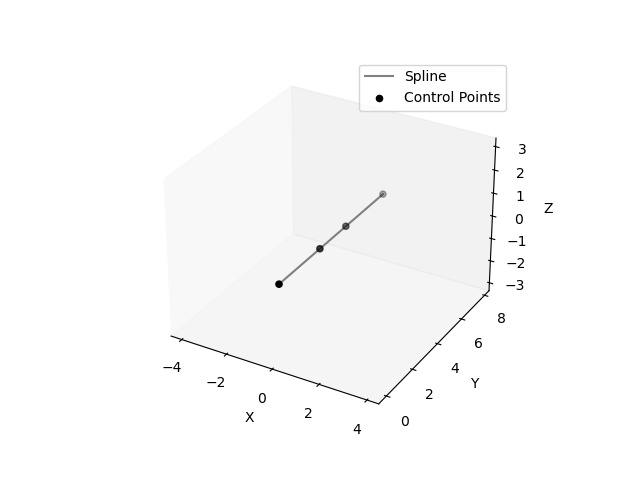

In [409]:
# control_points = mdna.Shapes.trefoil(num_turns=1)
#control_points = mdna.Shapes.helix(radius=1, pitch=0, height=0.5, num_turns=3)
control_points = np.array([[0,0,0],[0,0.75,0],[0,1.25,0],[0,2,0]])
spline = mdna.SplineFrames(control_points,nbp=24,closed=False)
spline.plot_frames(spline=True,triads=False,control_points=True,transparent=True,legend=False)

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

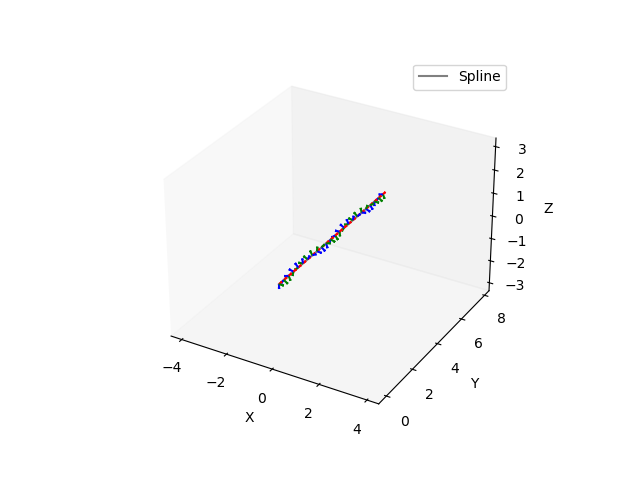

In [410]:
spline.plot_frames(spline=True,triads=True,control_points=False,transparent=True)

In [411]:
import copy
dna = mdna.StructureGenerator(spline)
traj_raw = dna.get_traj()
traj_raw.save('__raw.pdb')

builder = mdna.Build(dna)
new_dna = builder.equilibrate(endpoints_fixed=False)
traj = new_dna.get_traj()

traj.superpose(reference=traj_raw,frame=0)
traj.save('__equilibrated.pdb')

AGTGTCACAGTTACGCGAGTCTGG
cycle 0: 
8 moves initated
E = 275.25886757316204 kT
E = 74.17000196053134 kT
E = 70.25401072465107 kT
E = 71.58853849884302 kT
8 moves initated


### Scale spline with set number of bases


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 160



(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

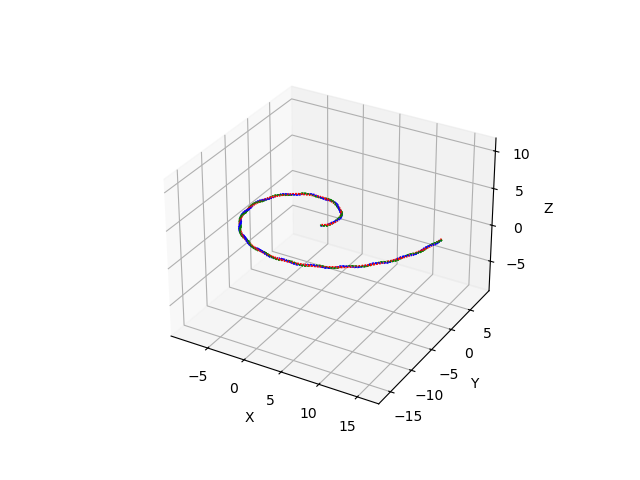

In [316]:
control_points = mdna.Shapes.spiral(radius=1, pitch=1, height=1)
spline = mdna.SplineFrames(control_points,nbp=160)
spline.plot_frames()

### Set dLk (based on twist) of structure


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 120

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: 0
	Current twist number: 12.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 36.00 degrees



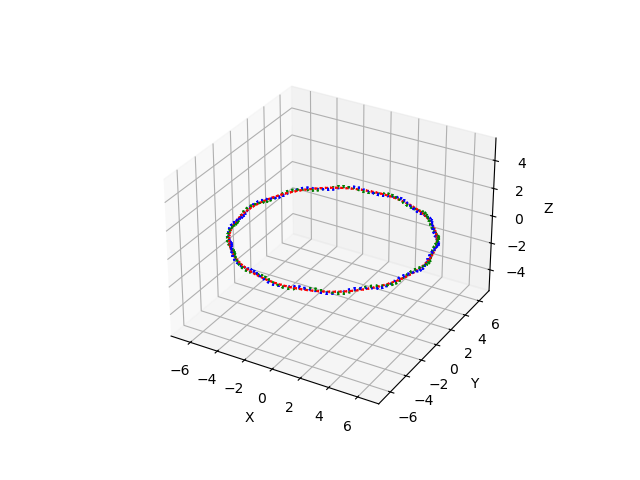

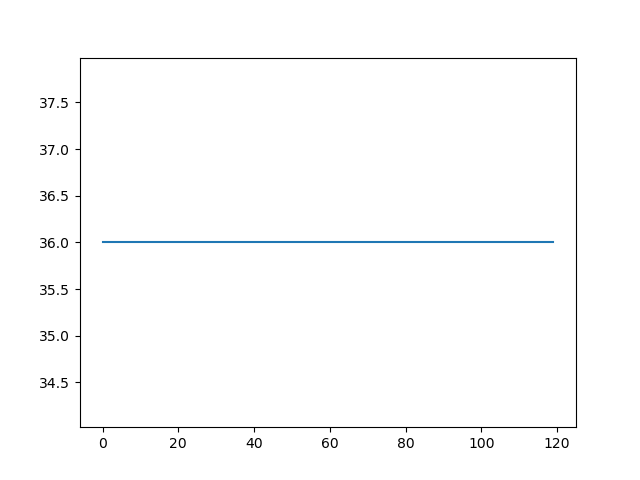

In [412]:
initial_control_points = mdna.Shapes.circle(radius=5)
spline = mdna.SplineFrames(control_points=initial_control_points,
                            nbp=120,
                            closed=True,
                            verbose=False,
                            dLk=0)
spline.plot_frames()
spline.frames.shape
fig, ax = plt.subplots()
ax.plot(spline.twister.twists)

Structure is requested to be circular:
	Excess twist per base to make ends meet: 0.93 degrees
	New twist angle per base pair: 35.22 

Adjusting twist angles to match the given Delta linking number: 0
	Current twist number: 9.00
	Old twist angle per base pair: 35.22 degrees
	Adjusted twist angle per base pair: 35.22 degrees



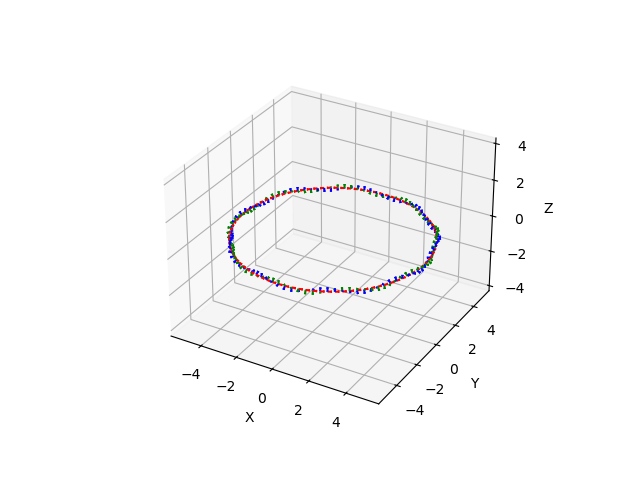

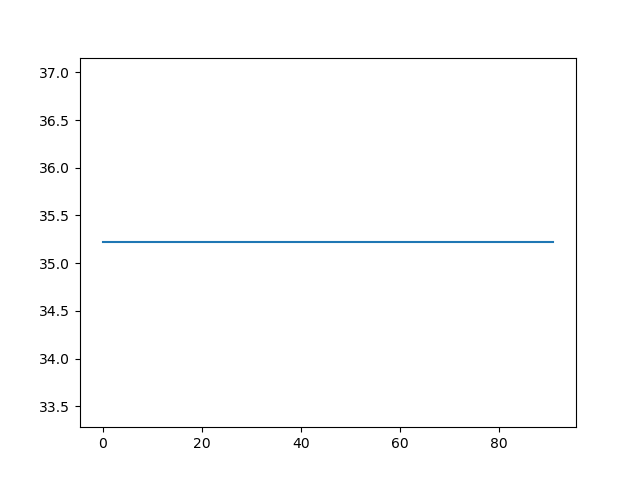

In [421]:
%matplotlib ipympl
initial_control_points = mdna.Shapes.circle(radius=5)
spline = mdna.SplineFrames(control_points=initial_control_points,
                            nbp=None,
                            closed=True,
                            verbose=False,
                            dLk=0)
spline.plot_frames()
spline.frames.shape
fig, ax = plt.subplots()
ax.plot(spline.twister.twists)

In [423]:
dna = mdna.StructureGenerator(spline,circular=True)
build = mdna.Build(dna)
eq = build.equilibrate(closed=True)
traj = eq.get_traj()
nuc = mdna.NucleicFrames(traj)

GAAGGATTTTACGAGCTTATGCACTAAGAAGTGCTCTCACTGGTCGCGAATGCATCCCCGAAGGAAGGGACCTCCATCGGTGTCCCGTCGAT
cycle 0: 
25 moves initated
E = 1367.3791670753635 kT
E = 342.778357503156 kT
E = 305.3979294691913 kT
E = 300.25800863268086 kT
E = 299.22926099904856 kT
E = 306.57809318320056 kT
25 moves initated


(<Figure size 1000x350 with 12 Axes>,
 array([<Axes: title={'center': 'shear'}>,
        <Axes: title={'center': 'stretch'}>,
        <Axes: title={'center': 'stagger'}>,
        <Axes: title={'center': 'buckle'}>,
        <Axes: title={'center': 'propeller'}>,
        <Axes: title={'center': 'opening'}>,
        <Axes: title={'center': 'shift'}>,
        <Axes: title={'center': 'slide'}>,
        <Axes: title={'center': 'rise'}>, <Axes: title={'center': 'tilt'}>,
        <Axes: title={'center': 'roll'}>,
        <Axes: title={'center': 'twist'}>], dtype=object))

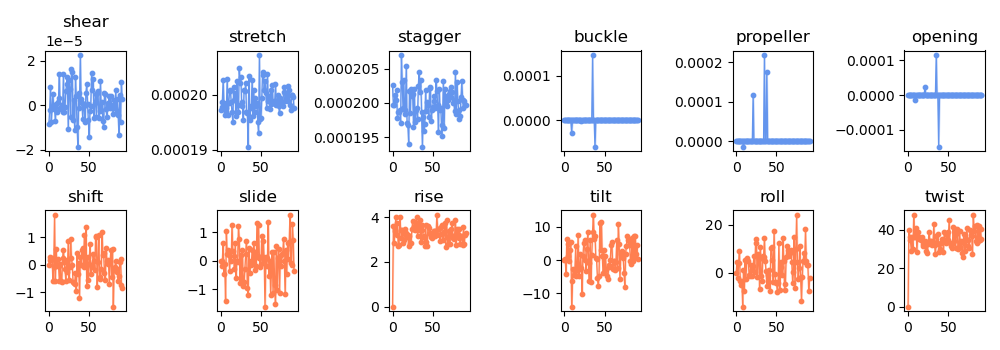

In [426]:
params, names = nuc.get_parameters()
mdna.plot_parameters(params, names)

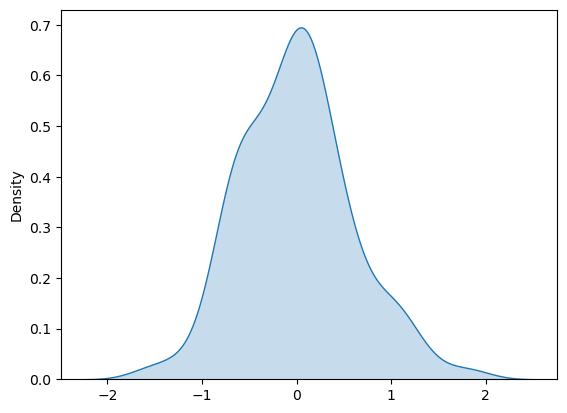

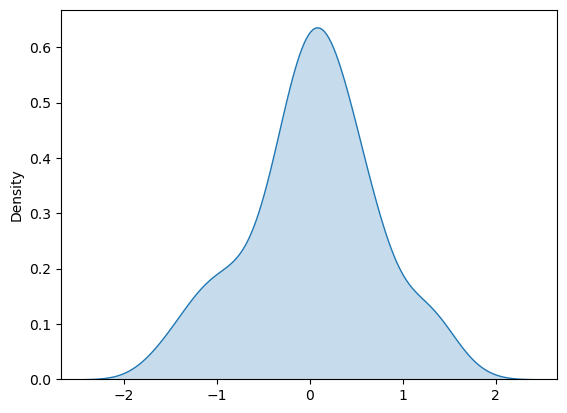

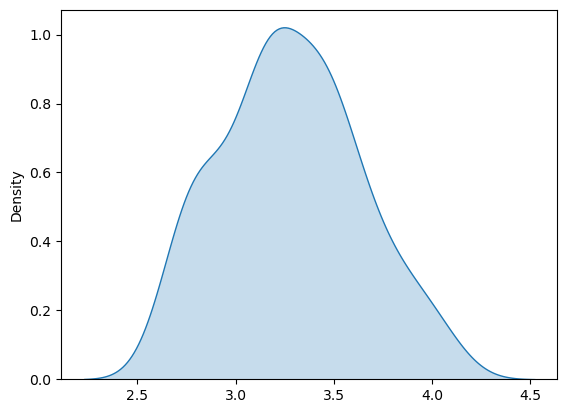

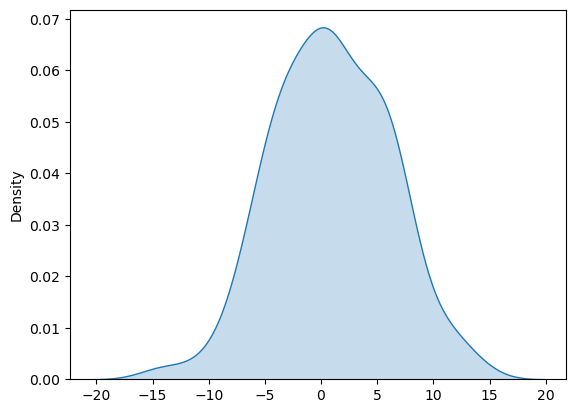

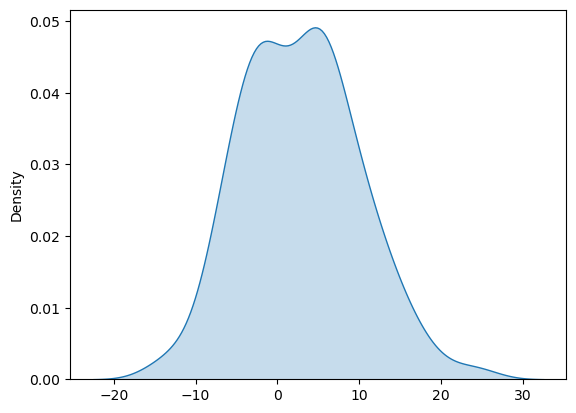

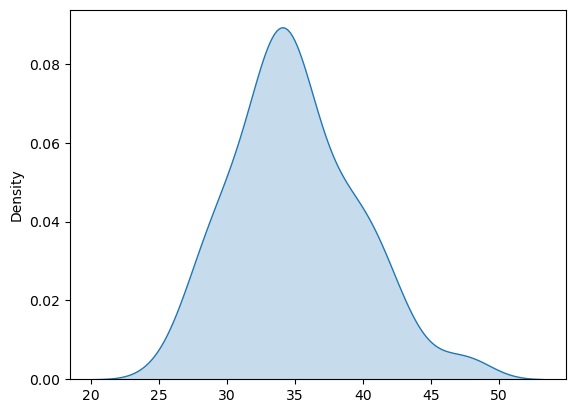

In [447]:
%matplotlib inline

for name in names[6:]:
    param = params[:,1:,names.index(name)][0]
    fig, ax = plt.subplots()
    import seaborn as sns
    sns.kdeplot(param,fill=True)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

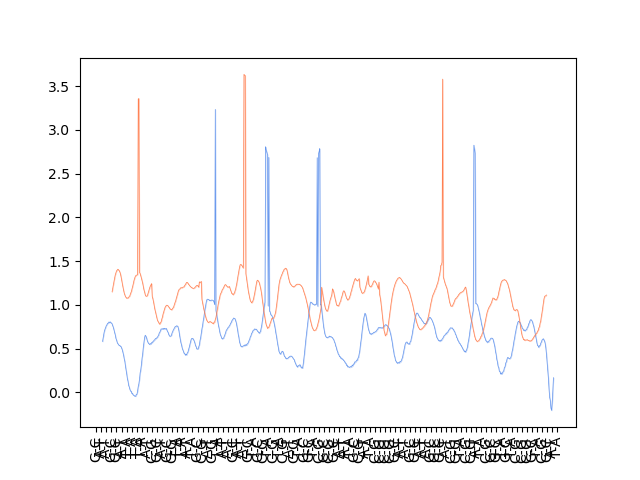

In [424]:
grooves = mdna.GrooveAnalysis(traj)
grooves.plot_groove_widths()


In [ ]:

    def adjust_to_dLk(self):
        """Adjust the twist angles to match the given Delta linking number."""
        current_twist_number = sum(self.twists)/360
        print(f"\tCurrent twist number: {current_twist_number:.2f}")
        old_twist_angle = sum(self.twists) / self.frames.shape[0]
        new_twist_number = np.floor(current_twist_number) + self.dLk
        #print(current_twist_number, new_twist_number, self.dLk)

        # Change the twist angles to match the new twist
        new_twist_angle = new_twist_number * 360 / self.frames.shape[0]
        #print(old_twist_angle, new_twist_angle)
        print(f"\tOld twist angle per base pair: {old_twist_angle:.2f} degrees")
        print(f"\tAdjusted twist angle per base pair: {new_twist_angle:.2f} degrees\n")
        return new_twist_angle


In [108]:
target_bp = 100
n_bp = spline.frames.shape[0]
total_length = spline.arc_length[-1]
ratio = (target_bp*spline.frame_spacing)/total_length
new_control_points = control_points * ratio

new_spline = mdna.SplineFrames(control_points=new_control_points,closed=True,verbose=True)
new_spline.frames.shape

Initializing spline
Evaluating spline
Calculating arc length
Evenly distributing 55 points along the spline and computing derivatives.
Structure is requested to be circular:
 Excess twist per base to make ends meet: 4.99 degrees


(55, 4, 3)

In [88]:
target_bp = 101


initial_arc_length = spline.arc_length[-1]-spline.frame_spacing
predicted_initial_number_of_bp = int(initial_arc_length/spline.frame_spacing)
actual_initial_number_of_bp = spline.frames.shape[0]

print('Predicted number of bp:',predicted_initial_number_of_bp)
print('Initial number of bp:',actual_initial_number_of_bp)

scaling = target_bp/actual_initial_number_of_bp
new_control_points = spline.control_points*scaling
new_spline = mdna.SplineFrames(control_points=new_control_points,closed=True, verbose=True)
new_arc_length = new_spline.arc_length[-1]

actual_number_of_bp = new_spline.frames.shape[0]
predicted_number_of_bp = int(new_arc_length/new_spline.frame_spacing)
print('RESCALING')
print('Predicted number of bp:',predicted_number_of_bp)
print('Actual number of bp:',actual_number_of_bp)

print(len(new_spline.segment_lengths))

# print(number_of_bp,spline.frames.shape,arc_length,scaling)
# #new_control_points = mdna.Shapes.circle(radius=3*scaling)
# #spline = mdna.SplineFrames(control_points=new_control_points,closed=True, verbose=True)
# arc_length = spline.arc_length[-1]
# number_of_bp = int(np.round(arc_length/spline.frame_spacing,0))
# print(number_of_bp,spline.frames.shape,arc_length,scaling)
# if number_of_bp != target_bp:
#     raise ValueError('Number of bp is not correct')
# spline.plot_frames()

Initializing spline
Evaluating spline
Calculating arc length
Evenly distributing 55 points along the spline and computing derivatives.
Structure is requested to be circular:
 Excess twist per base to make ends meet: 4.99 degrees
Predicted number of bp: 54
Initial number of bp: 55
Initializing spline
Evaluating spline
Calculating arc length
Evenly distributing 102 points along the spline and computing derivatives.
Structure is requested to be circular:
 Excess twist per base to make ends meet: 1.01 degrees
RESCALING
Predicted number of bp: 101
Actual number of bp: 102
101


### Equilibrate

In [2]:
circular = True
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,0]])*5
spline = mdna.SplineFrames(control_points)
dna = mdna.StructureGenerator(spline,circular=circular)
builder = mdna.Build(dna)
new_dna = builder.equilibrate(closed=circular)
traj = new_dna.get_traj()
print(new_dna.sequence)

CTCTGCAGGGCTTGTCTCTGCGCCACCCGCAAGACAAGTCCATAG


/Users/thor/surfdrive/Projects/PMCpy/pmcpy/SO3/so3/SE3.py:17: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  inv[:3,3]  = -inv[:3,:3]@g[:3,3]
/Users/thor/surfdrive/Projects/PMCpy/pmcpy/MCStep/crankshaft.py:191: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  conf[id,:3,:3] = Rlab @ conf[id,:3,:3]


cycle 0: 
13 moves initated


/Users/thor/surfdrive/Projects/PMCpy/pmcpy/MCStep/singletriad.py:87: RuntimeWarning: overflow encountered in exp
  if np.random.uniform() >= np.exp(-dE):
/Users/thor/surfdrive/Projects/PMCpy/pmcpy/MCStep/clustertranslation.py:133: RuntimeWarning: overflow encountered in exp
  if np.random.uniform() >= np.exp(-dE):
/Users/thor/surfdrive/Projects/PMCpy/pmcpy/MCStep/crankshaft.py:136: RuntimeWarning: overflow encountered in exp
  if np.random.uniform() >= np.exp(-dE):


E = 56611.835593539625 kT
E = 20902.993968484643 kT
E = 5675.586305320377 kT
E = 341.3131422513421 kT
E = 226.1869688355212 kT
E = 198.2573941065497 kT
E = 198.2398871583447 kT
E = 194.99025646868856 kT
E = 195.81865141750887 kT
13 moves initated
CTCTGCAGGGCTTGTCTCTGCGCCACCCGCAAGACAAGTCCATAG


In [3]:
view = nv.show_mdtraj(builder.get_MC_traj())
view.clear_representations()
view.add_representation('ball+stick', selection='all', color='coral',radius=10)
view

NGLWidget(max_frame=175)

In [4]:
view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('ball+stick')
view

NGLWidget()

### Extend DNA

In [5]:
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,0]])*1
spline = mdna.SplineFrames(control_points)
dna = mdna.StructureGenerator(spline)

CCCTGAGTCC


In [6]:
builder = mdna.Build(dna, five_end='A')
builder.extend(nbp=20)
traj = builder.get_traj()
traj.save('test_extend.pdb')


view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('licorice')
view


cycle 0: 
6 moves initated
E = 336.61122114760917 kT
E = 70.05405563244287 kT
E = 70.43497874224506 kT
6 moves initated
GGGCAATTATACCGAAGTAAGCTGTGATTC


NGLWidget()

In [7]:
view = nv.show_mdtraj(builder.get_MC_traj())
view.clear_representations()
view.add_representation('ball+stick', selection='all', color='coral',radius=3)
view

NGLWidget(max_frame=25)

### Connect DNA's

AGACGGCTTA
TCTGCAATAG


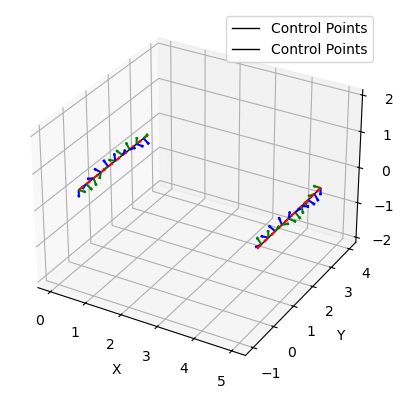

In [48]:
control_points_A = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,0]])*1
#control_points_B = control_points_A+5*2
control_points_B = control_points_A + np.array([5,0,0])
control_points_B = control_points_B[::-1]

spline_A = mdna.SplineFrames(control_points_A)
spline_B = mdna.SplineFrames(control_points_B)

dna_a = mdna.StructureGenerator(spline_A)
dna_b = mdna.StructureGenerator(spline_B)


builder = mdna.Build(dna_a, dna_b, five_end='A', three_end='B')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
builder.plot_frames(dna_a, ax)
builder.plot_frames(dna_b, ax)

In [55]:
builder.connect()
traj = builder.get_traj()

Optimal BP: 21, Twist Difference per BP: 0.0 degrees
f [0, 1, 2, 3, 4, 5, 6, 7, 8, 47, 48, 49, 50, 51, 52, 53, 54, 55]
c 56
a 10
b 10
cycle 0: 
9 moves initated
E = 2316.873958649586 kT
E = 1111.9092356545161 kT
E = 645.8464250397362 kT
E = 488.7756713373554 kT
E = 430.57702939812486 kT
E = 400.1964254487602 kT
E = 391.34159894947385 kT
E = 378.10508199594426 kT
E = 379.0022349212935 kT
9 moves initated
GTCAAGCTTTTACAGTCAGGCACATAGACACTCTTGACCTGGTGGAAGCGGAGTAC


In [56]:
view = nv.show_mdtraj(builder.get_MC_traj())
view.clear_representations()
view.add_representation('ball+stick', selection='all', color='coral',radius=3)
view

NGLWidget(max_frame=175)

In [ ]:
view = nv.show_mdtraj(traj)
view.clear()
view.add_licorice(selection='all')
view

NGLWidget()

In [33]:
M = np.array([[0,0,0],[0,4,0],[2,3,0],
              [4,4,0],[4,0,0]])*3

spline = mdna.SplineFrames(M,closed=True)
dna = mdna.StructureGenerator(spline)
traj = dna.get_traj()
view = nv.show_mdtraj(traj)
view

Structure is requested to be circular:
 Excess twist per base to make ends meet: 0.64 degrees
GGGTCTGCCTACGTGGCCTAAGACTCGCAATCGACGTAGGGTCGGAGGTCTGCTTCCGACGTTTGATCCCTTTACCGAATAATAGAGTCCTTTCTCCTCGATGATGTAGTCAGGACGGAATTATAGCGGGAAAG


NGLWidget()

In [ ]:

M = np.array([[0,0,0],[0,4,0],[2,0,0],
              [2,4,0]])*3
spline = mdna.SplineFrames(M,closed=False)
spline.plot_frames()
dna = mdna.StructureGenerator(spline)
traj = dna.get_traj()
view = nv.show_mdtraj(traj)
view
traj.save('N_DNA.pdb')

In [ ]:

D = np.array([[0,0,0],[0,4,0],[3,1,0],
              [1,2,0],[0,0,0]])*3
spline = mdna.SplineFrames(D,closed=True)
spline.plot_frames()
dna = mdna.StructureGenerator(spline)
traj = dna.get_traj()
view = nv.show_mdtraj(traj)
view

In [ ]:
traj.save('A_dna.pdb')